In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
# filter warnings
warnings.filterwarnings('ignore')
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats-train-validadion-and-evaluation/validation/dog/dog.10728.jpg
/kaggle/input/dogs-vs-cats-train-validadion-and-evaluation/validation/dog/dog.10577.jpg
/kaggle/input/dogs-vs-cats-train-validadion-and-evaluation/validation/dog/dog.10063.jpg
/kaggle/input/dogs-vs-cats-train-validadion-and-evaluation/validation/dog/dog.10500.jpg
/kaggle/input/dogs-vs-cats-train-validadion-and-evaluation/validation/dog/dog.11327.jpg
/kaggle/input/dogs-vs-cats-train-validadion-and-evaluation/validation/dog/dog.11780.jpg
/kaggle/input/dogs-vs-cats-train-validadion-and-evaluation/validation/dog/dog.12325.jpg
/kaggle/input/dogs-vs-cats-train-validadion-and-evaluation/validation/dog/dog.11766.jpg
/kaggle/input/dogs-vs-cats-train-validadion-and-evaluation/validation/dog/dog.12035.jpg
/kaggle/input/dogs-vs-cats-train-validadion-and-evaluation/validation/dog/dog.10295.jpg
/kaggle/input/dogs-vs-cats-train-validadion-and-evaluation/validation/dog/dog.12430.jpg
/kaggle/input/dogs-vs-cats-train

In [2]:
import os
train_file_path="/kaggle/input/dogs-vs-cats-train-validadion-and-evaluation/train/"
validation_file_path="/kaggle/input/dogs-vs-cats-train-validadion-and-evaluation/validation/"
#train_file_path="/kaggle/input/horses-or-humans-dataset/horse-or-human/train/"
#validation_file_path="/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/"
train_dataset=[]
validation_dataset=[]
for i in os.listdir(train_file_path):
    train_dataset+=[train_file_path+i+"/"+j for j in os.listdir(train_file_path+i)]
    validation_dataset+=[validation_file_path+i+"/"+j for j in os.listdir(validation_file_path+i)]
#train_dataset_new=[train_file_path+i+"/"+j for i in os.listdir(train_file_path) for j in os.listdir(train_file_path+i) ]

In [3]:
#Range i want to use
train_dataset=train_dataset[9601:10401]
validation_dataset=validation_dataset[2401:2601]

In [4]:
import cv2
def fotoToArray(dataset):
    array_foto=[0 for i in range(len(dataset))]
    a=0
    for i in dataset:
        foto=cv2.imread(i,0)
        array_foto[a]=foto
        a+=1
    array_foto=np.array(array_foto)
    return array_foto
train_resimler=fotoToArray(train_dataset)
validation_resimler=fotoToArray(validation_dataset)

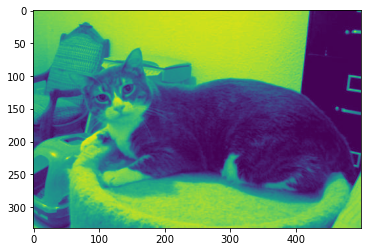

In [5]:
import matplotlib.pyplot as plt
plt.imshow(train_resimler[400])

In [ ]:
def resim_boyut_ayarlama(dataset):
    yukseklik=64
    genislik=64
    dataset=dataset.reshape(dataset.shape[0],1)
    
    for a in range(dataset.shape[0]):
        dataset[a,0]=cv2.resize(dataset[a,0],(genislik,yukseklik))
        a+=1

resim_boyut_ayarlama(train_resimler)
resim_boyut_ayarlama(validation_resimler)

In [ ]:
def etiket_hazirlama(X):
    z = np.zeros(int(X.shape[0]/2),dtype=np.float32)
    o = np.ones(int(X.shape[0]/2),dtype=np.float32)
    Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
    return Y

train_etiket=etiket_hazirlama(train_resimler)
validation_etiket=etiket_hazirlama(validation_resimler)

In [ ]:
def formata_dondurme(deger):
    deger_liste=[]
    for i in range(deger.shape[0]):
        deger_liste.append(deger[i])
    deger_resimler=np.array(deger_liste,dtype=np.float32)
    return deger_resimler

train_resimler=formata_dondurme(train_resimler)
validation_resimler=formata_dondurme(validation_resimler)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_resimler, train_etiket, test_size=0.15, random_state=42)


In [ ]:
def photo_scaling(dataset):
    for i in range(dataset.shape[0]):
        for j in range(dataset[i].shape[0]):
            for k in range(dataset[i].shape[1]):
                dataset[i][j,k]=dataset[i][j,k]/255
    return dataset
X_train=photo_scaling(X_train)
X_test=photo_scaling(X_test)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

In [ ]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

In [ ]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

In [ ]:
import numpy as np
def initialize_weights_and_bias(dimension):
    w=np.full((dimension,1),0.001)
    b=0.0
    return w,b

weight, bias =initialize_weights_and_bias(10)
print(f"bias=>{bias} \n weight \n {weight}")

In [ ]:
def sigmoid(z):
    y_head= 1/(1+np.exp(-z))
    return y_head

sigmoid(np.array([1,2,3,4,5,566]))

In [ ]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]    
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [ ]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 100 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list


In [ ]:
 # prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction
# predict(parameters["weight"],parameters["bias"],x_test)

In [ ]:
import matplotlib.pyplot as plt
import sys
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.001, num_iterations = 2000)

# LOGISTIC REGRESSION WİTH SKLEARN 

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=42)
print(f"test accuracy: {lr.fit(x_train.T,y_train.T).score(x_test.T,y_test.T)}")
print(f"train accuracy: {lr.fit(x_train.T,y_train.T).score(x_train.T,y_train.T)}")